In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
df=pd.read_csv('International_Report_Departures.csv')

In [3]:
df.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
5,10/01/2007,2007,10,14761,SFB,33,11928,GLA,493,20444,JN,0,Departures,0,8,8
6,02/01/2002,2002,2,14100,PHL,23,11032,CUN,148,20402,MMQ,1,Departures,0,1,1
7,02/01/2008,2008,2,16091,YIP,43,16166,YQG,936,20201,AMQ,1,Departures,0,3,3
8,11/01/2001,2001,11,13930,ORD,41,16042,YEG,916,19531,AC,0,Departures,0,1,1
9,07/01/2003,2003,7,13198,MCI,64,13514,MTY,148,20201,AMQ,1,Departures,0,1,1


In [4]:
df.shape

(930808, 16)

In [5]:
df.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [7]:
#check dublicated value
df.duplicated('data_dte')
df.duplicated('data_dte',keep='last')


0          True
1          True
2          True
3          True
4          True
          ...  
930803    False
930804    False
930805    False
930806    False
930807    False
Length: 930808, dtype: bool

In [8]:
#check Missing value
df.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [9]:
df['carrier']

0         PFQ
1          5Y
2          GL
3         AMQ
4          5L
         ... 
930803     MQ
930804     CM
930805     MQ
930806     AM
930807     BW
Name: carrier, Length: 930808, dtype: object

In [10]:
mostCommonCarier=df['carrier'].value_counts()
mostCommonCarier

AA     58739
DL     48520
UA     42469
CO     25754
FX     21621
       ...  
WOA        1
SKB        1
PNA        1
KO         1
PU         1
Name: carrier, Length: 734, dtype: int64

In [13]:
mostCommonCarier='AA'

In [14]:
df['carrier'].fillna(mostCommonCarier, inplace=True)

In [15]:
#check Missing value
df.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [16]:
df=df.drop('type',axis='columns')

In [17]:
df.head(5)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,0,20,20


In [19]:

df= df.loc[df.Year > 2000]


In [20]:
# Show total flights per year
df1_year = df.groupby('Year')['Total'].sum()
df1_year=pd.DataFrame(df1_year).reset_index()

df1_year

,Year,Total
0,2001,1192116
1,2002,1186081
2,2003,1316455
3,2004,1408786
4,2005,1453344
5,2006,1482477
6,2007,1518663
7,2008,1499268
8,2009,1399579
9,2010,1450964


# visualization 

In [24]:
import seaborn as sns

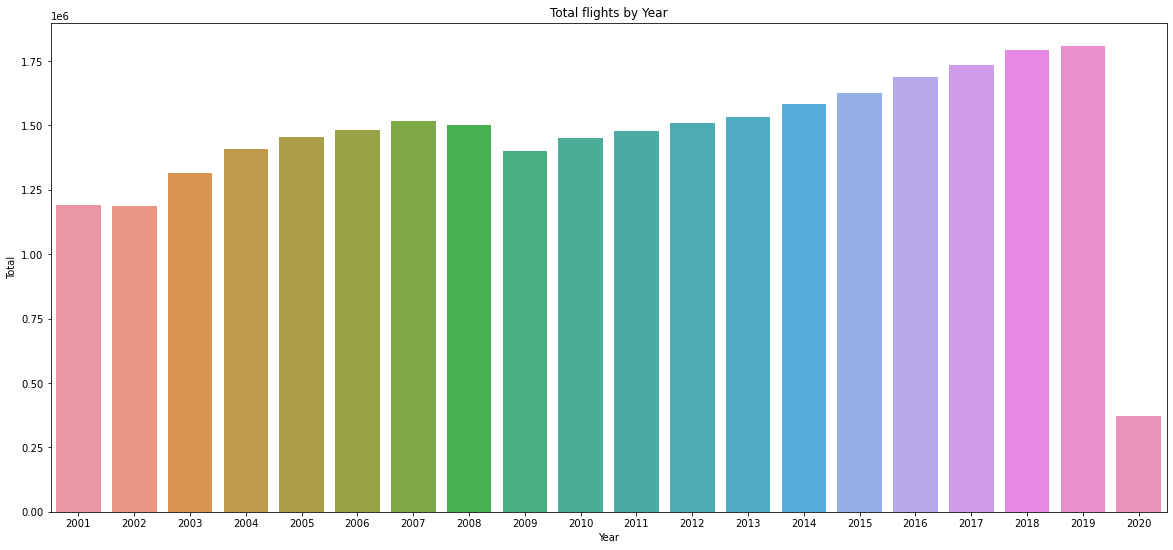

In [22]:
plt.figure(figsize=(20,9))
plt.title("Total flights by Year")
sns.barplot(x='Year',y='Total',data=df1_year)
plt.show()

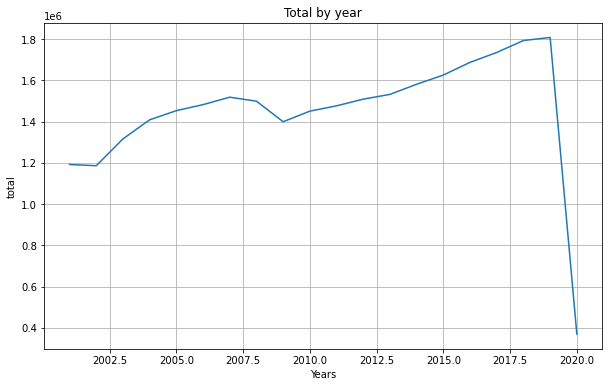

In [36]:
plt.figure(figsize=(10,6))
plt.title("Total by year")
plt.xlabel("Years")
plt.ylabel('total')
plt.plot(df1_year['Year'],df1_year['Total'])

plt.grid(True)
plt.show()
